# Predicting Home Prices in King’s County, Seattle Using Multilinear Regression

Author: Jake Oddi

## Purpose

The goal for this project was, given a dataset of houses that have sold in King’s County, Seattle between 2014 and 2015, predict the selling prices of similar houses from that area. The predictions will be done on a dataset comprised of houses from the very same county. All of the given features will be the same as in the original dataset as well. They include: Id, date, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_basement, sqft_above, floors, waterfront, view, grade, condition, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, and sale_yr. 

## Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.formula.api as sm

In [4]:
kc = pd.read_csv('kc_house_data_train.csv')

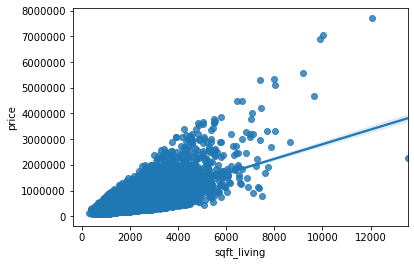

In [8]:
sns.regplot(kc['sqft_living'], kc['price'])

There seems to be a somewhat strong positive association between sqft_living and selling price

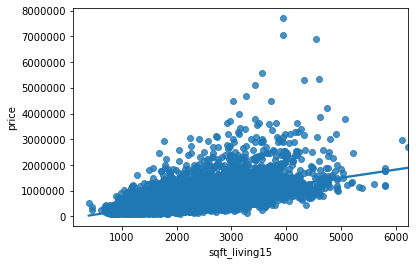

In [9]:
sns.regplot(kc['sqft_living15'], kc['price'])

There seems to be a somewhat strong positive association between sqft_living15 (average sqft_living of the 15 surrounding homes) and selling price

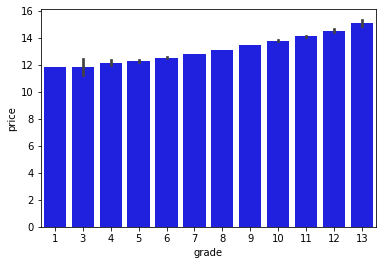

In [15]:
sns.barplot(kc['grade'], np.log(kc['price']), color = 'blue')

As shown in the bar plot, the log price increases linearly with grade

## Cleaning

When writing functions to clean this dataset, I had to be careful not to delete rows with values I didn’t like. Instead, I had to impute values of the mean or median for whichever feature I was dealing with. Overall, the dataset did not have many anomalies that required attention, as there were no null values. My most difficult fix was converting the given date string, which was formatted in an odd way, into a datetime object, then accessing different components of that object for feature engineering purposes.

In [ ]:
cleaning funcs

## A First Glance

To better understand the dataset, I used the describe() method on a number of columns, then used a statsmodels OLS function to create an initial regression summary, where I used bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, yr_built as my predictor variables. Next I wanted to examine correlation within all the features in my dataset, so I used a seaborn pairplot and heatmap. Although multicollinearity is an issue in regression, my goal for this project was to maximize predictability. As a result, even after seeing high Variance Inflation Factors (VIFs) for a number of my predictor variables, I did not remove these variables from my dataset, as doing so reduced my predictability.

In [ ]:
heatmap and ols output

## Feature Engineering

The first two features I created were home_age and yrs_since_renovation. These were the easiest to create and brought the Root Mean Squared Error (RMSE) of my Scikit-Learn linear regression model down to around 200k from around 210k. Next I used one-hot encoding to create dummy variables for each of the 87 zip codes in the dataset, reducing RMSE by 45k.

In [ ]:
feature eng funcs and last clean